In [1]:
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt
import time
import pandas as pd
import os
import glob
import seaborn as sns

%matplotlib inline

sns.set_context("paper")

In [121]:
DIM = 2
# DIM = 3

RADIUSES = [0.00001, 0.0001, 0.001, 0.01, 0.1]
# RADIUSES = [0.000001]
EXPERIMENTS = ['compass', 'german', 'cc']
PATH = 'result/bottleneck/'
SAVEPATH = 'result/images/'

PLOTCOL = ['H0_ortho', 'H1_ortho', 'H0_plane', 'H1_plane']
PLOT_RENAME = {PLOTCOL[0]: '$H_0$ Orthogonal',
               PLOTCOL[1]: '$H_1$ Orthogonal',
              PLOTCOL[2]: '$H_0$ Projection',
              PLOTCOL[3]: '$H_1$ Projection'}

In [122]:
df_dict = {}

for EXPERIMENT in EXPERIMENTS:
    list_of_bigdfs = []
    for RADIUS in RADIUSES:
        load_files = PATH + EXPERIMENT + '_label_*_dim_' + str(DIM) + '_std_' + str(RADIUS) + '_.pickle'
        read_list = glob.glob(load_files)
        list_of_dfs = []
        for file in read_list:
            with open(file, 'rb') as file:
                d = pickle.load(file)
                for column in d:
                    new = d[[column]].copy()
                    if column in PLOTCOL:
                        new['measure'] = PLOT_RENAME[column]
                    else:
                        new['measure'] = column
                    new.columns = new.columns.str.replace(column, 'Bottleneck distance')
                    list_of_dfs.append(new)

        big_df = pd.concat(list_of_dfs)
        big_df['Noise level'] = RADIUS
        list_of_bigdfs.append(big_df)
    bigbig_df = pd.concat(list_of_bigdfs)
    df_dict[EXPERIMENT] = bigbig_df

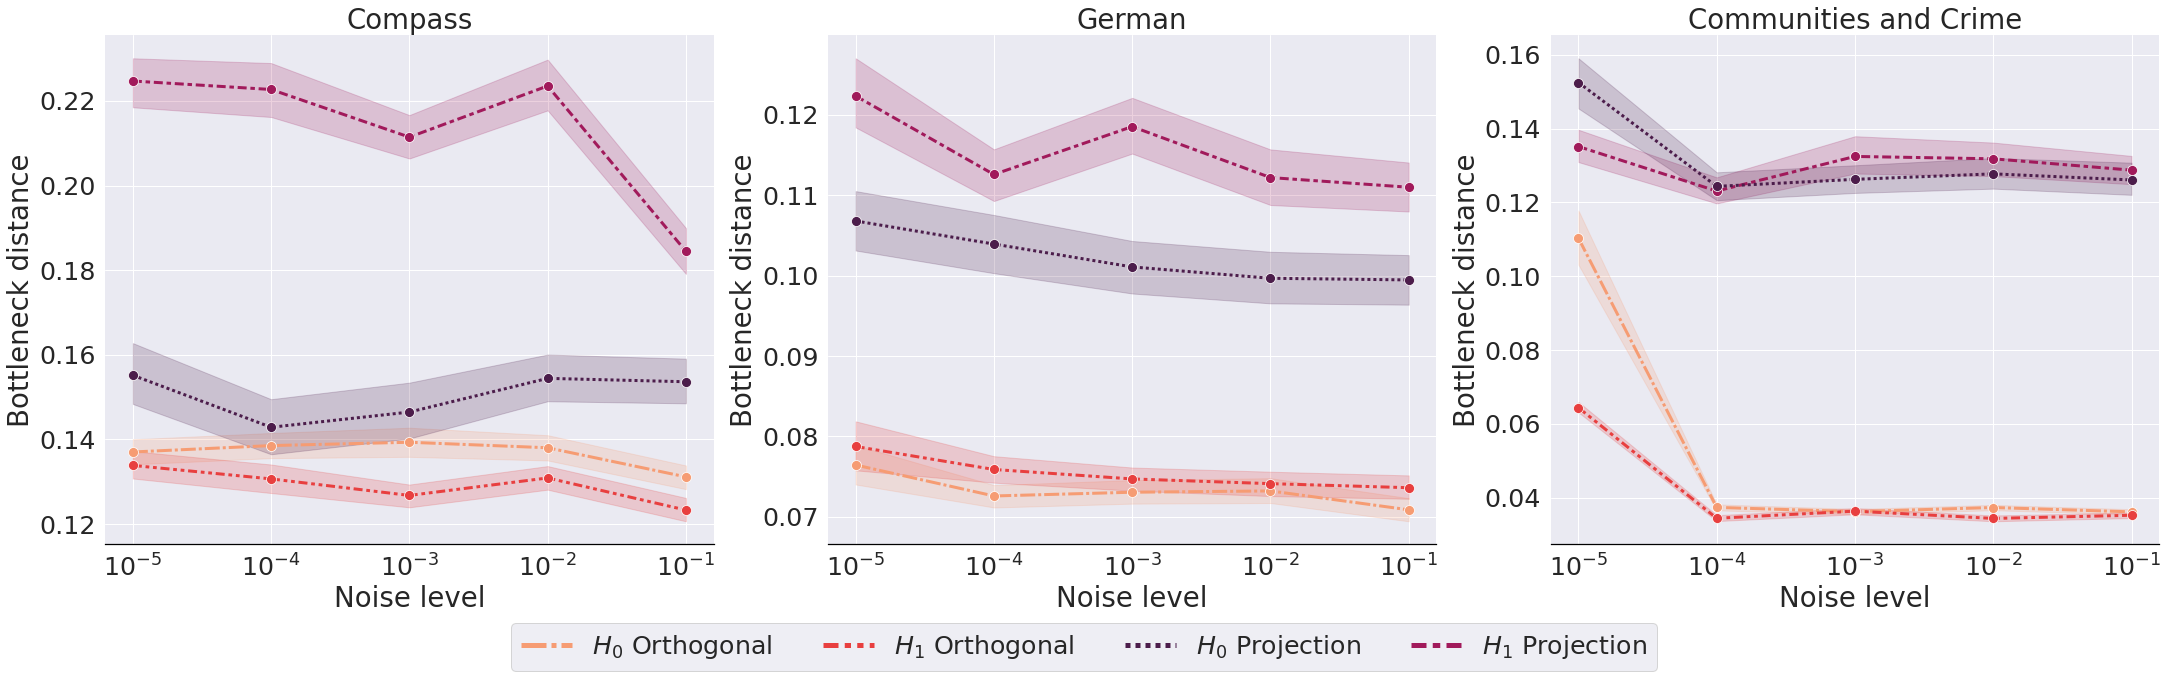

In [123]:
sns.set_style("white")
sns.set(font_scale=2.3)
figsize = (30, 8.5)

fig, ax = plt.subplots(1,3, figsize=figsize, constrained_layout = True)

count = 0
for exp in EXPERIMENTS:
    g_results= sns.lineplot(x = 'Noise level',
                    y = 'Bottleneck distance',
                    data=df_dict[exp],    
                    palette="rocket_r",
                    style = "measure",
                    hue="measure",
                    marker = 'o', 
                    hue_order = ['$H_0$ Orthogonal', '$H_1$ Orthogonal', '$H_1$ Projection', '$H_0$ Projection'],
                    alpha=1.0,
                    ax = ax[count],
                    linewidth = 3,
                    markersize = 10)

    g_results.set(xscale='log')

    sns.despine(left=True);
    # plt.ylim(0.3,0.9)
    # ax.set_ylabel("Accuracy")
    # ax.set_xlabel("Data noise")
#     ax[count].legend().set_title('')
    ax[count].legend().remove()
    title = ''
    if exp == "compass":
        title = "Compass"
    elif exp == "german":
        title = "German"
    elif exp == "cc":
        title = "Communities and Crime"
    
    ax[count].set_title(title)
    ax[count].spines['bottom'].set_color('black')        # setting up Y-axis tick color to red
    ax[count].spines['left'].set_color('black') 
    # plt.savefig(gen_image_name("results", model, explainer, experiment))
#     h, l = plt.gca().get_legend_handles_labels()
#     plt.legend([h[0], h[1], h[3], h[2]], [l[0], l[1], l[3], l[2]], loc='center left', bbox_to_anchor=(1, 0.5))
    count = count + 1

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
h, l = [sum(lol, []) for lol in zip(*lines_labels)]

leg = fig.legend([h[0], h[1], h[3], h[2]], [l[0], l[1], l[3], l[2]], loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.11))
leg.get_lines()[0].set_linewidth(5)
leg.get_lines()[1].set_linewidth(5)
leg.get_lines()[2].set_linewidth(5)
leg.get_lines()[3].set_linewidth(5)
# leg.legendHandles[0]._legmarker.set_markersize(50)
filesave = SAVEPATH + "bottleneck_distance_tabular" + ".png"

plt.savefig(filesave, transparent=False,  bbox_inches='tight')


In [27]:
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

fig.legend(lines, labels)
plt.show()

In [40]:
labels[]

TypeError: list indices must be integers or slices, not list

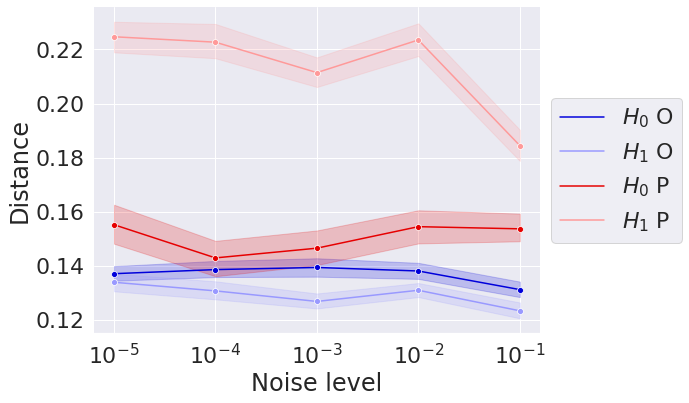

In [139]:
sns.set_style("dark")
sns.set(font_scale=2.0)
figsize = (8, 6)

fig, ax = plt.subplots(figsize=figsize)

g_results= sns.lineplot(x = 'Noise level',
                y = 'Distance',
                data=bigbig_df,    
                palette="seismic",
                hue="measure",
                marker = 'o', 
                hue_order = ['$H_0$ O', '$H_1$ O', '$H_1$ P', '$H_0$ P'],
                alpha=1.0,
                ax = ax)

g_results.set(xscale='log')

sns.despine(left=True);
# plt.ylim(0.3,0.9)
# ax.set_ylabel("Accuracy")
# ax.set_xlabel("Data noise")
ax.legend().set_title('')
# ax.set_title(experiment)
# plt.savefig(gen_image_name("results", model, explainer, experiment))
h, l = plt.gca().get_legend_handles_labels()
plt.legend([h[0], h[1], h[3], h[2]], [l[0], l[1], l[3], l[2]], loc='center left', bbox_to_anchor=(1, 0.5))


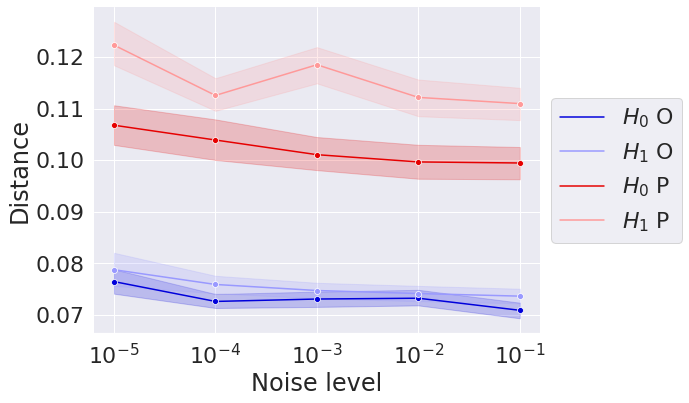

In [142]:
sns.set_style("dark")
sns.set(font_scale=2.0)
figsize = (8, 6)

fig, ax = plt.subplots(figsize=figsize)

g_results= sns.lineplot(x = 'Noise level',
                y = 'Distance',
                data=bigbig_df,    
                palette="seismic",
                hue="measure",
                marker = 'o', 
                hue_order = ['$H_0$ O', '$H_1$ O', '$H_1$ P', '$H_0$ P'],
                alpha=1.0,
                ax = ax)

g_results.set(xscale='log')

sns.despine(left=True);
# plt.ylim(0.3,0.9)
# ax.set_ylabel("Accuracy")
# ax.set_xlabel("Data noise")
ax.legend().set_title('')
# ax.set_title(experiment)
# plt.savefig(gen_image_name("results", model, explainer, experiment))
h, l = plt.gca().get_legend_handles_labels()
plt.legend([h[0], h[1], h[3], h[2]], [l[0], l[1], l[3], l[2]], loc='center left', bbox_to_anchor=(1, 0.5))


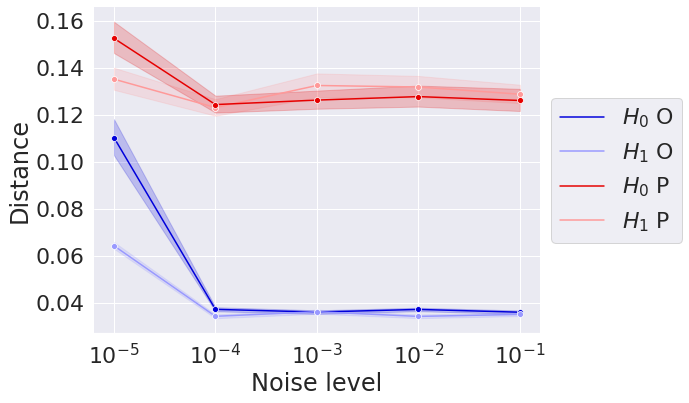

In [145]:
sns.set_style("dark")
sns.set(font_scale=2.0)
figsize = (8, 6)

fig, ax = plt.subplots(figsize=figsize)

g_results= sns.lineplot(x = 'Noise level',
                y = 'Distance',
                data=bigbig_df,    
                palette="seismic",
                hue="measure",
                marker = 'o', 
                hue_order = ['$H_0$ O', '$H_1$ O', '$H_1$ P', '$H_0$ P'],
                alpha=1.0,
                ax = ax)

g_results.set(xscale='log')

sns.despine(left=True);
# plt.ylim(0.3,0.9)
# ax.set_ylabel("Accuracy")
# ax.set_xlabel("Data noise")
ax.legend().set_title('')
# ax.set_title(experiment)
# plt.savefig(gen_image_name("results", model, explainer, experiment))
h, l = plt.gca().get_legend_handles_labels()
plt.legend([h[0], h[1], h[3], h[2]], [l[0], l[1], l[3], l[2]], loc='center left', bbox_to_anchor=(1, 0.5))


In [11]:
read_list

['result/bottleneck/compass_label_1_dim_2_std_1e-06_.pickle',
 'result/bottleneck/compass_label_0_dim_2_std_1e-06_.pickle']

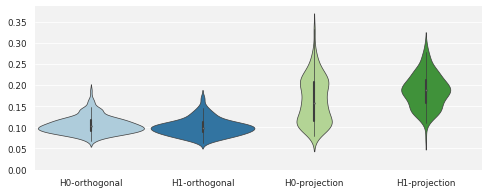

In [2]:
# Draw persistence diagram

DIM = 2
# DIM = 3

# RADIUSES = [0.001, 0.01, 0.1, 1.0] # for general mnist
# RADIUSES = [0.001, 0.002, 0.005, 0.01] # for mnist dim = 2
# RADIUSES = [0.000001, 0.00001, 0.0001] # for compass
# RADIUSES = [0.00001, 0.0001, 0.001] # for german and cc

RADIUSES = [1.0]


# EXPERIMENTS = ['mnist']
# EXPERIMENTS = ['fashion_mnist']
EXPERIMENTS = ['compass']
# EXPERIMENTS = ['german', 'cc']
# EXPERIMENTS = ['fashion_mnist']


PATH = 'result/bottleneck/'
SAVEPATH = 'result/images/'
# PLOTCOL = ['H0_gauss', 'H1_gauss', 'H0_ortho','H1_ortho', 'H0_plane', 'H1_plane']
PLOTCOL = ['H0_ortho', 'H1_ortho', 'H0_plane', 'H1_plane']

for EXPERIMENT in EXPERIMENTS:
    for RADIUS in RADIUSES:
        load_files = PATH + EXPERIMENT + '_label_*_dim_' + str(DIM) + '_std_' + str(RADIUS) + '_.pickle'
        read_list = glob.glob(load_files)

        list_of_dfs = []
        for file in read_list:
            with open(file, 'rb') as file:
                d = pickle.load(file)
            list_of_dfs.append(d)

        big_df = pd.concat(list_of_dfs, ignore_index=True)

        title = 'Normalized bottleneck distances for ' + EXPERIMENT + ', dim=' + str(DIM) + ', radius=' + str(RADIUS)
        title = 'Normalized Bottleneck-distances'
        plt.figure(figsize=(8, 3))
        sns.set_context("paper")
        sns.set_style("darkgrid", {"axes.facecolor": ".95"})
        ax = sns.violinplot(data=big_df[PLOTCOL], width=0.95,
                         palette="Paired",
                           linewidth = 0.7)
        ax.set_xticklabels(['H0-orthogonal', 'H1-orthogonal', 'H0-projection', 'H1-projection'])
#         ax.set(title = title)
#         ax.set_title(title, fontsize = 14)
        sns.despine(left=True);
        plt.ylim(0,)
#         plt.savefig(SAVEPATH + "BD_fashion_mnist" + '.png')

#         plt.savefig(SAVEPATH + title + '.png')

    

In [30]:
# Draw persistence diagram

DIM = 2
# DIM = 3

# RADIUSES = [0.001, 0.01, 0.1, 1.0] # for general mnist
# RADIUSES = [0.001, 0.002, 0.005, 0.01] # for mnist dim = 2
# RADIUSES = [0.000001, 0.00001, 0.0001] # for compass
# RADIUSES = [0.00001, 0.0001, 0.001] # for german and cc

RADIUSES = [1.0]


# EXPERIMENTS = ['mnist']
# EXPERIMENTS = ['fashion_mnist']
EXPERIMENTS = ['compass', 'german', 'cc']
# EXPERIMENTS = ['german', 'cc']
# EXPERIMENTS = ['fashion_mnist']


PATH = 'result/bottleneck/'
SAVEPATH = 'result/images/'
PLOTCOL = ['H0_ortho', 'H0_plane', 'H1_ortho', 'H1_plane']

for RADIUS in RADIUSES:
    table_row = np.zeros(12)
    row_offset = 4
    row_position = 0
    for EXPERIMENT in EXPERIMENTS:

        load_files = PATH + EXPERIMENT + '_label_*_dim_' + str(DIM) + '_std_' + str(RADIUS) + '_.pickle'
        read_list = glob.glob(load_files)

        list_of_dfs = []
        for file in read_list:
            with open(file, 'rb') as file:
                d = pickle.load(file)
            list_of_dfs.append(d)

        big_df = pd.concat(list_of_dfs, ignore_index=True)
        table_row[row_position] = big_df['H0_ortho'].mean()
        
        title = 'Normalized bottleneck distances for ' + EXPERIMENT + ', dim=' + str(DIM) + ', radius=' + str(RADIUS)
        print(title)
        print("--- Mean: %.4f %.4f %.4f %.4f" % (big_df['H0_ortho'].mean(), 
                                               big_df['H0_plane'].mean(),
                                               big_df['H1_ortho'].mean(),
                                               big_df['H1_plane'].mean()))
        print("--- STD: %.4f %.4f %.4f %.4f" % (big_df['H0_ortho'].std(), 
                                               big_df['H0_plane'].std(),
                                               big_df['H1_ortho'].std(),
                                               big_df['H1_plane'].std()))
        
#         title = 'Normalized Bottleneck-distances'
#         plt.figure(figsize=(8, 3))
#         sns.set_context("paper")
#         sns.set_style("darkgrid", {"axes.facecolor": ".95"})
#         ax = sns.violinplot(data=big_df[PLOTCOL], width=0.95,
#                          palette="Paired",
#                            linewidth = 0.7)
#         ax.set_xticklabels(['H0-orthogonal', 'H1-orthogonal', 'H0-projection', 'H1-projection'])
# #         ax.set(title = title)
# #         ax.set_title(title, fontsize = 14)
#         sns.despine(left=True);
#         plt.ylim(0,)
# #         plt.savefig(SAVEPATH + "BD_fashion_mnist" + '.png')

# #         plt.savefig(SAVEPATH + title + '.png')

    

Normalized bottleneck distances for compass, dim=2, radius=1.0
--- Mean: 0.1062 0.1641 0.1012 0.1875
--- STD: 0.0203 0.0537 0.0204 0.0400
Normalized bottleneck distances for german, dim=2, radius=1.0
--- Mean: 0.0623 0.0725 0.0700 0.1010
--- STD: 0.0108 0.0164 0.0106 0.0202
Normalized bottleneck distances for cc, dim=2, radius=1.0
--- Mean: 0.0347 0.0950 0.0343 0.1159
--- STD: 0.0056 0.0212 0.0053 0.0234


In [31]:
big_df

,H0_gauss,H1_gauss,H0_plane,H1_plane,H0_ortho,H1_ortho
0,0.029985,0.034878,0.084791,0.165308,0.029323,0.039127
1,0.039662,0.035045,0.092783,0.125523,0.038120,0.029269
2,0.029630,0.036154,0.098736,0.101242,0.032358,0.030368
3,0.032990,0.033559,0.128488,0.149202,0.032077,0.028974
4,0.027645,0.034915,0.098769,0.112009,0.030712,0.032847
...,...,...,...,...,...,...
195,0.034300,0.040747,0.084145,0.117454,0.030846,0.033557
196,0.038746,0.040758,0.101625,0.092463,0.033214,0.033659
197,0.038506,0.033977,0.074554,0.102540,0.033530,0.033579
198,0.035772,0.037260,0.091373,0.148061,0.035166,0.028687


In [5]:
big_df

,H0_gauss,H1_gauss,H0_plane,H1_plane,H0_ortho,H1_ortho
0,0.187500,0.125000,0.216797,0.15625,0.187500,0.109375
1,0.109375,0.125000,0.156250,0.18750,0.109375,0.109375
2,0.140625,0.125000,0.250000,0.25000,0.133789,0.128906
3,0.125977,0.125000,0.166016,0.21875,0.145020,0.125000
4,0.128906,0.125000,0.226562,0.21875,0.125000,0.109375
...,...,...,...,...,...,...
195,0.171875,0.125000,0.218750,0.28125,0.191406,0.109375
196,0.128906,0.156250,0.125000,0.28125,0.148438,0.140625
197,0.117188,0.140625,0.093750,0.25000,0.125000,0.156250
198,0.156250,0.125000,0.156250,0.18750,0.142578,0.125000


In [3]:
from PIL import Image

DIM = 2
RADIUS = '*'
EXPERIMENT = 'mnist'
SAVEPATH = 'result/images/'

plot_files = SAVEPATH + 'Normalized bottleneck distances for ' + EXPERIMENT + ', dim=' + str(DIM) + ', radius=' + str(RADIUS) + '.png'

bmps = glob.glob(plot_files)


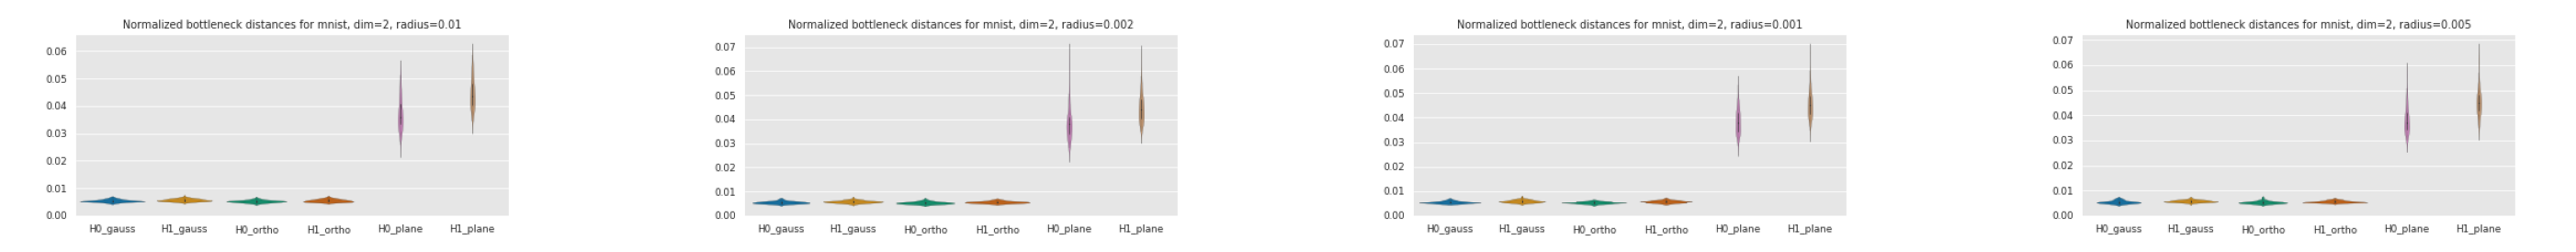

In [4]:
width=5
height=5
rows = 1
cols = 4
axes=[]
fig=plt.figure(figsize=(50, 20))

for a in range(rows*cols):
    b = Image.open(bmps[a])
    axes.append( fig.add_subplot(rows, cols, a+1) )
#     subplot_title=("Subplot"+str(a))
#     axes[-1].set_title(subplot_title)  
    plt.imshow(b)
    plt.axis('off')
# fig.tight_layout()    
plt.show()

(0.0, 1.0)

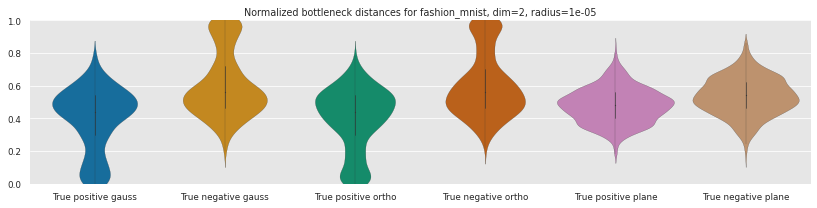

In [21]:
# Draw discriminator

DIM = 2

RADIUS = 0.00001

# EXPERIMENT = 'mnist'
EXPERIMENT = 'fashion_mnist'

PATH = 'result/discriminator/'
SAVEPATH = 'result/images/'
PLOTCOL = ['True positive gauss', 'True negative gauss', 'True positive ortho', 'True negative ortho', 'True positive plane', 'True negative plane']
# PLOTCOL = ['H0_gauss', 'H1_gauss', 'H0_plane', 'H1_plane']

load_files = PATH + EXPERIMENT + '_label_*_dim_' + str(DIM) + '_std_' + str(RADIUS) + '_.pickle'
read_list = glob.glob(load_files)

list_of_dfs = []
for file in read_list:
    with open(file, 'rb') as file:
        d = pickle.load(file)
    list_of_dfs.append(d)

big_df = pd.concat(list_of_dfs, ignore_index=True)

title = 'Normalized bottleneck distances for ' + EXPERIMENT + ', dim=' + str(DIM) + ', radius=' + str(RADIUS)
plt.figure(figsize=(14, 3))
sns.set_context("paper")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.violinplot(data=big_df[PLOTCOL], width=0.9,
                 palette="colorblind",
                   linewidth = 0.2)
ax.set(title = title)
sns.despine(left=True);
plt.ylim(0,1)

#         plt.savefig(SAVEPATH + title + '.png')

In [22]:
plot_df = pd.DataFrame()

col_names = ['LIME (TP)','LIME (TN)',
             'SHAP (TP)','SHAP (TN)', 
             'EMaP d=2 (TP)','EMaP d=2 (TN)']

plot_df['SHAP (TP)'] = big_df['True positive shap']
plot_df['LIME (TP)'] = big_df['True positive lime']
plot_df['SHAP (TN)'] = big_df['True negative shap']
plot_df['LIME (TN)'] = big_df['True negative lime']
plot_df['EMaP d=2 (TP)'] = big_df['True positive ortho']
plot_df['EMaP d=2 (TN)'] = big_df['True negative ortho']


# discriminator_file = 'result/discriminator/cc_label_1_dim_2_std_1e-05_.pickle'
# d = pd.read_pickle(discriminator_file)
# plot_df['EMaP (r=0.00001)'] = d['True positive ortho']

plot_df.describe()

,SHAP (TP),LIME (TP),SHAP (TN),LIME (TN),EMaP d=2 (TP),EMaP d=2 (TN)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.931680,0.966960,0.931680,0.966960,0.398800,0.604740
std,0.033572,0.040561,0.033572,0.040561,0.190079,0.196013
min,0.800000,0.780000,0.800000,0.780000,0.000000,0.220000
25%,0.900000,0.960000,0.900000,0.960000,0.300000,0.460000
50%,0.940000,0.980000,0.940000,0.980000,0.440000,0.560000
75%,0.960000,1.000000,0.960000,1.000000,0.540000,0.700000
max,1.000000,1.000000,1.000000,1.000000,0.780000,1.000000


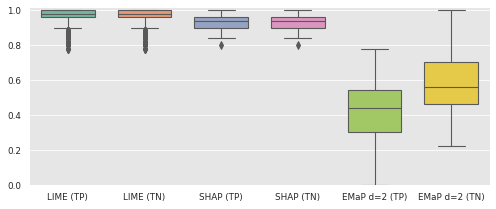

In [23]:
plt.figure(figsize=(7, 3))
sns.set_context("paper")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.boxplot(data=plot_df[col_names], width=0.7,
                   palette="Set2",
                   linewidth = 1.1)
# ax.set_xticklabels(col_names)
#         ax.set(title = title)
#         ax.set_title(title, fontsize = 14)
sns.despine(left=True);
plt.ylim(0,1.01)
plt.tight_layout()
plt.savefig('result/images/fashion_mnist_discriminator_d2_r0_00001.png')

In [14]:
ax

<AxesSubplot:>